In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baca dataset
df = pd.read_csv("kelulusan_mahasiswa.csv")

# Info dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IPK                10 non-null     float64
 1   Jumlah_Absensi     10 non-null     int64  
 2   Waktu_Belajar_Jam  10 non-null     int64  
 3   Lulus              10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 448.0 bytes
None
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus
0  3.8               3                 10      1
1  2.5               8                  5      0
2  3.4               4                  7      1
3  2.1              12                  2      0
4  3.9               2                 12      1


Missing values:
 IPK                  0
Jumlah_Absensi       0
Waktu_Belajar_Jam    0
Lulus                0
dtype: int64


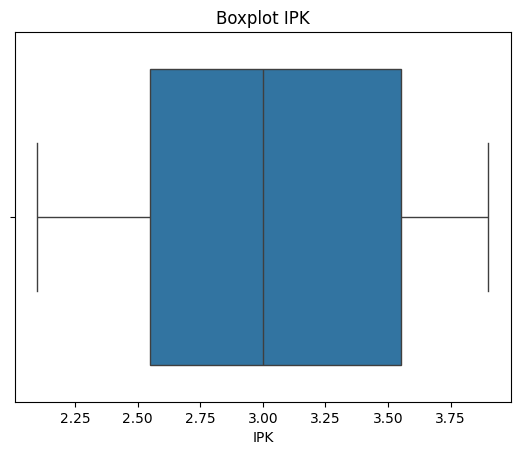

In [ ]:
# Cek missing values
print("Missing values:\n", df.isnull().sum())

# Hapus duplikat
df = df.drop_duplicates()

# Boxplot untuk cek outlier
sns.boxplot(x=df['IPK'])
plt.title("Boxplot IPK")
plt.show()


In [ ]:
# Statistik deskriptif
print(df.describe())


             IPK  Jumlah_Absensi  Waktu_Belajar_Jam      Lulus
count  10.000000        10.00000          10.000000  10.000000
mean    3.030000         6.00000           6.400000   0.500000
std     0.639531         3.05505           3.306559   0.527046
min     2.100000         2.00000           2.000000   0.000000
25%     2.550000         4.00000           4.000000   0.000000
50%     3.000000         5.50000           6.000000   0.500000
75%     3.550000         7.75000           8.750000   1.000000
max     3.900000        12.00000          12.000000   1.000000


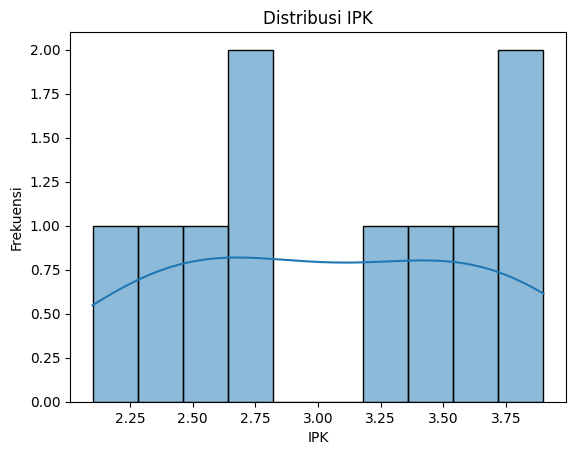

In [ ]:
sns.histplot(df['IPK'], bins=10, kde=True)
plt.title("Distribusi IPK")
plt.xlabel("IPK")
plt.ylabel("Frekuensi")
plt.show()


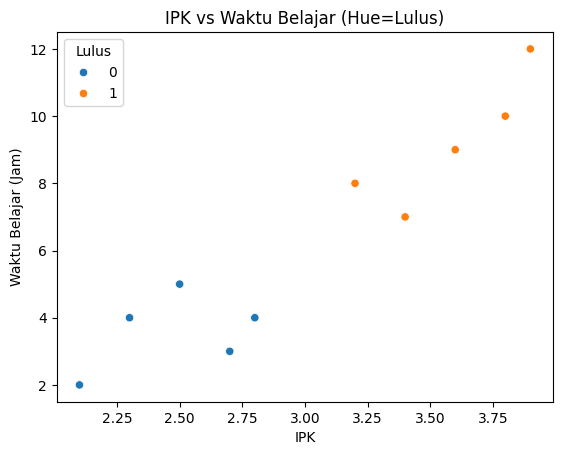

In [ ]:
sns.scatterplot(x='IPK', y='Waktu_Belajar_Jam', data=df, hue='Lulus')
plt.title("IPK vs Waktu Belajar (Hue=Lulus)")
plt.xlabel("IPK")
plt.ylabel("Waktu Belajar (Jam)")
plt.show()


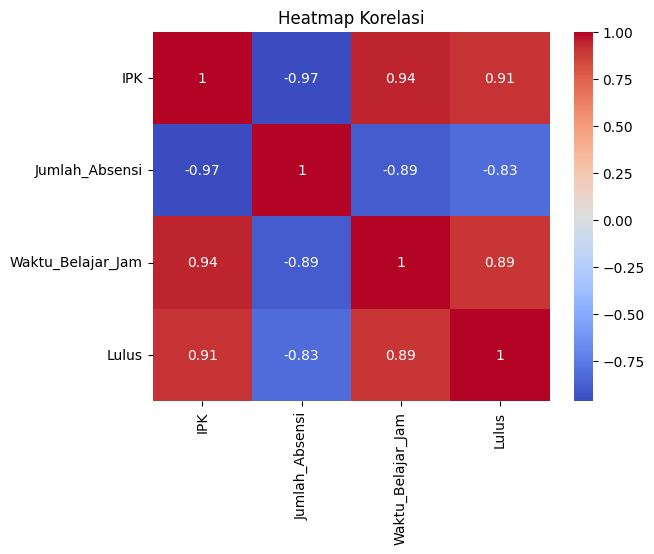

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()


In [ ]:
df['Rasio_Absensi'] = df['Jumlah_Absensi'] / 14
df['IPK_x_Study'] = df['IPK'] * df['Waktu_Belajar_Jam']

# Simpan dataset baru
df.to_csv("processed_kelulusan.csv", index=False)
df.head()


,IPK,Jumlah_Absensi,Waktu_Belajar_Jam,Lulus,Rasio_Absensi,IPK_x_Study
0,3.8,3,10,1,0.214286,38.0
1,2.5,8,5,0,0.571429,12.5
2,3.4,4,7,1,0.285714,23.8
3,2.1,12,2,0,0.857143,4.2
4,3.9,2,12,1,0.142857,46.8


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Lulus', axis=1)
y = df['Lulus']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)




print(X_train.shape, X_val.shape, X_test.shape)



(7, 5) (1, 5) (2, 5)
